# Analysis of TSA position in HGs Bound structures

In [1]:
# Useful stuff
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import glob
import pickle
import pytraj as pt
import PyQt5

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots
import pyemma.coordinates as coor
import gc

In [2]:
Traj_directory = "/Volumes/Nia_HardDrive/HGs/TRAJS/"
Top_directory = "/Volumes/Nia_HardDrive/HGs/TRAJS/TOPS/"

In [3]:
K50Q_Designed_traj =[fi for fi in glob.glob(Traj_directory + 'HG3K50Q_TS/' + '*super.dcd')]
K50Q_Designed_top = Top_directory+"hg3_k50q_Ts_aligned.pdb"

Bound_Designed_traj =[fi for fi in glob.glob(Traj_directory + 'HG3_TS/'+ '*super.dcd')]
Bound_Designed_top = Top_directory+"hg3_ts_aligned.pdb"

Bound_Shell_traj =[fi for fi in glob.glob(Traj_directory + 'HG317shell_TS/' + '*super.dcd')]
Bound_Shell_top = Top_directory+"hg317_shell_ts.pdb"

Bound_Core_traj =[fi for fi in glob.glob(Traj_directory + 'HG4_TS/' +'*super.dcd')]
Bound_Core_top = Top_directory+"hg4_ts_aligned.pdb"

Bound_Evolved_traj =[fi for fi in glob.glob(Traj_directory + 'HG317_TS/' + '*super.dcd')]
Bound_Evolved_top = Top_directory+"hg317_ts_aligned.pdb"


In [4]:
trajfiles_Bound = []
trajfiles_Bound.append(K50Q_Designed_traj)
trajfiles_Bound.append(Bound_Designed_traj)
trajfiles_Bound.append(Bound_Shell_traj)
trajfiles_Bound.append(Bound_Core_traj)
trajfiles_Bound.append(Bound_Evolved_traj)

topfiles_Bound = []
topfiles_Bound.append(K50Q_Designed_top)
topfiles_Bound.append(Bound_Designed_top)
topfiles_Bound.append(Bound_Shell_top)
topfiles_Bound.append(Bound_Core_top)
topfiles_Bound.append(Bound_Evolved_top)


In [5]:
topfiles_Bound

['/Volumes/Nia_HardDrive/HGs/TRAJS/TOPS/hg3_k50q_Ts_aligned.pdb',
 '/Volumes/Nia_HardDrive/HGs/TRAJS/TOPS/hg3_ts_aligned.pdb',
 '/Volumes/Nia_HardDrive/HGs/TRAJS/TOPS/hg317_shell_ts.pdb',
 '/Volumes/Nia_HardDrive/HGs/TRAJS/TOPS/hg4_ts_aligned.pdb',
 '/Volumes/Nia_HardDrive/HGs/TRAJS/TOPS/hg317_ts_aligned.pdb']

In [22]:
# Load pytraj directories
HG3_K50Q = pt.iterload(trajfiles_Bound[0],topfiles_Bound[0])
HG3_D = pt.iterload(trajfiles_Bound[1],topfiles_Bound[1])
HG3_S = pt.iterload(trajfiles_Bound[2],topfiles_Bound[2])
HG3_C = pt.iterload(trajfiles_Bound[3],topfiles_Bound[3])
HG3_E = pt.iterload(trajfiles_Bound[4],topfiles_Bound[4])

In [25]:
HG3_K50Q_TSA_RMSD = pt.rmsd(HG3_K50Q, ref=HG3_K50Q[0], mask=':300', nofit=True)
HG3_D_TSA_RMSD = pt.rmsd(HG3_D, ref=HG3_D[0], mask=':300', nofit=True)
HG3_S_TSA_RMSD = pt.rmsd(HG3_S, ref=HG3_S[0], mask=':300', nofit=True)
HG3_C_TSA_RMSD = pt.rmsd(HG3_C, ref=HG3_C[0], mask=':300', nofit=True)
HG3_E_TSA_RMSD = pt.rmsd(HG3_E, ref=HG3_E[0], mask=':300', nofit=True)

In [ ]:
# Save RMSD files
rmsd_files_directory = "/Volumes/Nia_HardDrive/HGs/Analysis_Bound/TSA_RMSD/"
pickle.dump(HG3_K50Q_TSA_RMSD, open (rmsd_files_directory + "rmsd_K50Q_Bound.p", "wb"))
pickle.dump(HG3_D_TSA_RMSD, open (rmsd_files_directory + "rmsd_D_Bound.p", "wb"))
pickle.dump(HG3_S_TSA_RMSD, open (rmsd_files_directory + "rmsd_S_Bound.p", "wb"))
pickle.dump(HG3_C_TSA_RMSD, open (rmsd_files_directory + "rmsd_C_Bound.p", "wb"))
pickle.dump(HG3_E_TSA_RMSD, open (rmsd_files_directory + "rmsd_E_Bound.p", "wb"))

In [9]:
# Loading Previously Saved RMSD files

rmsd_files_directory = "/Volumes/Nia_HardDrive/HGs/Analysis_Bound/TSA_RMSD/"
HG3_K50Q_TSA_RMSD = pickle.load(open(rmsd_files_directory + 'rmsd_K50Q_Bound.p','rb'))
HG3_D_TSA_RMSD = pickle.load(open(rmsd_files_directory + 'rmsd_D_Bound.p','rb'))
HG3_S_TSA_RMSD = pickle.load(open(rmsd_files_directory + 'rmsd_S_Bound.p','rb'))
HG3_C_TSA_RMSD = pickle.load(open(rmsd_files_directory + 'rmsd_C_Bound.p','rb'))
HG3_E_TSA_RMSD = pickle.load(open(rmsd_files_directory + 'rmsd_E_Bound.p','rb'))


In [15]:
import seaborn as sns

def hist_plot(all_data,mcolor):
    plt.figure(figsize=(10,10))
    plt.xlim(0,10)
    #plt.ylim(0,30)
    #plt.axvline(np.median(br_data),color='dimgray',ls='--', lw=2)

    #bins = np.arange(10,30,0.5)
    #kwargs = dict(bins = bins,density=False,stacked=True,ec='black')
    sns.kdeplot(np.array(all_data),color=mcolor,fill=mcolor)
    #plt.hist(br_data1, color=mcolor, **kwargs)
    #plt.hist(br_data2, color=mcolor, **kwargs)
    
    plt.xticks(np.arange(0,11,2),fontsize=50, fontname='Arial')
    plt.yticks(np.arange(0,2.1,0.4),fontsize=50, fontname='Arial')

    #plt.xlabel('Bottleneck Radius',fontsize=30)
    #plt.ylabel('Density',fontsize=30)
    plt.ylabel('')

    #print(np.mean(br_data))
   # print(np.median(br_data))

    #plt.axes([.55, .5, .3, .3], facecolor='y')
   
    #plt.savefig(str(title)+'.png',transparent=True,dpi='figure')

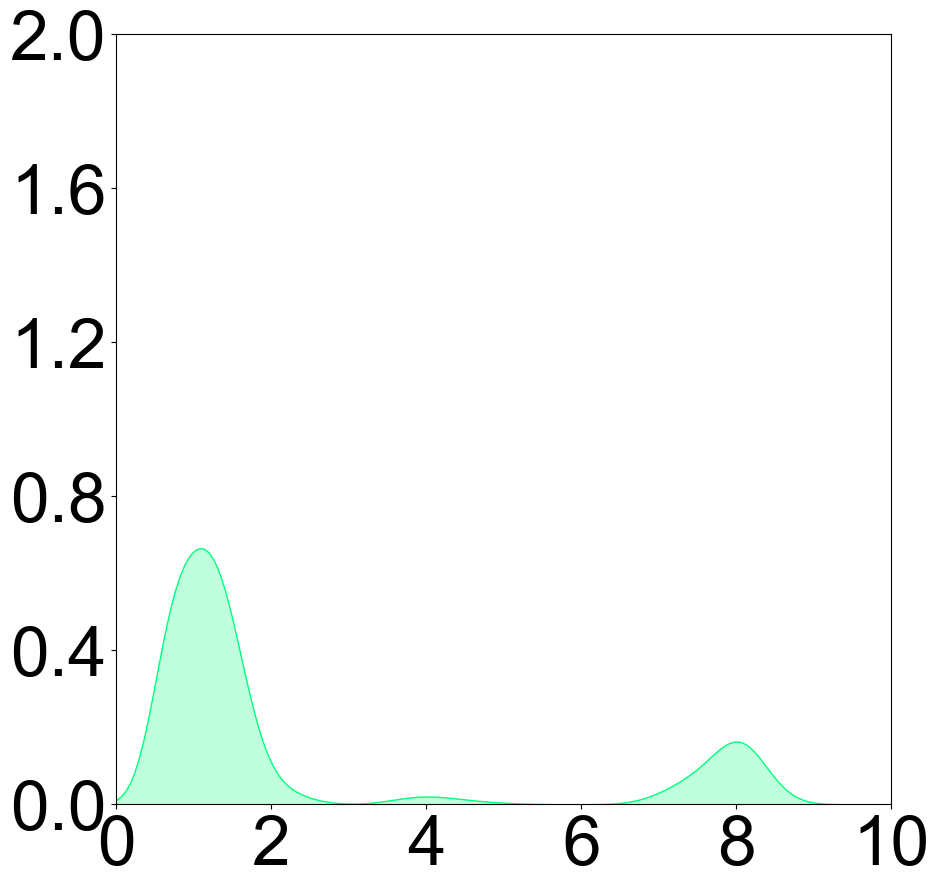

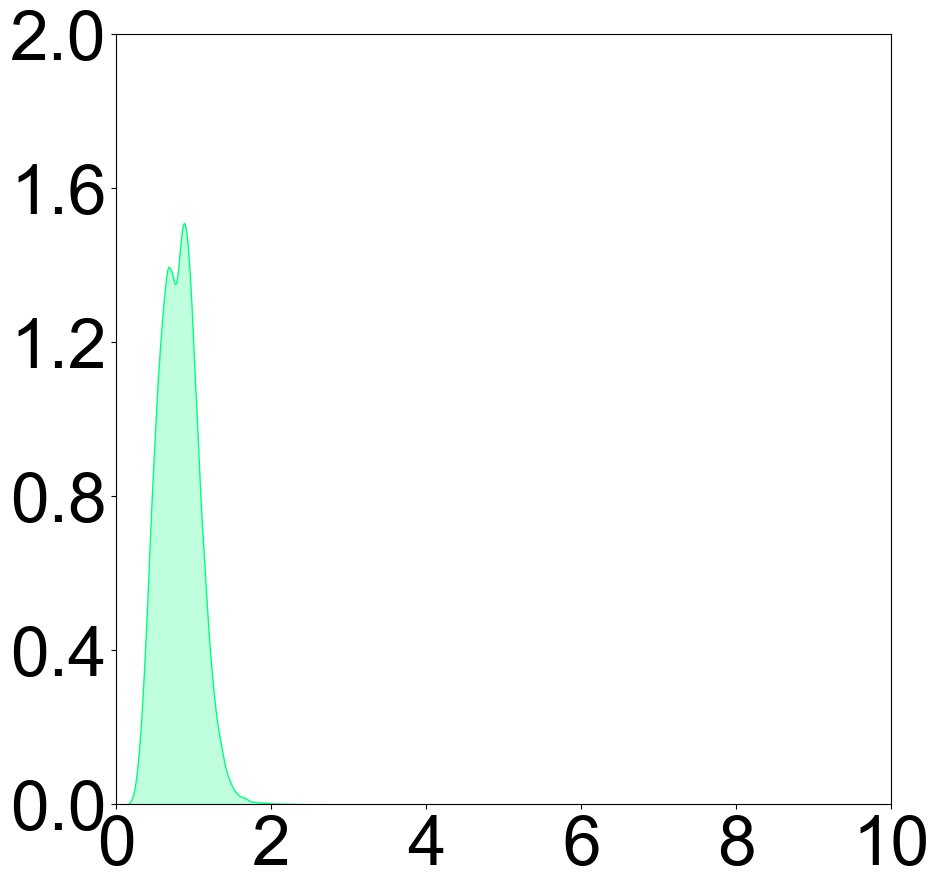

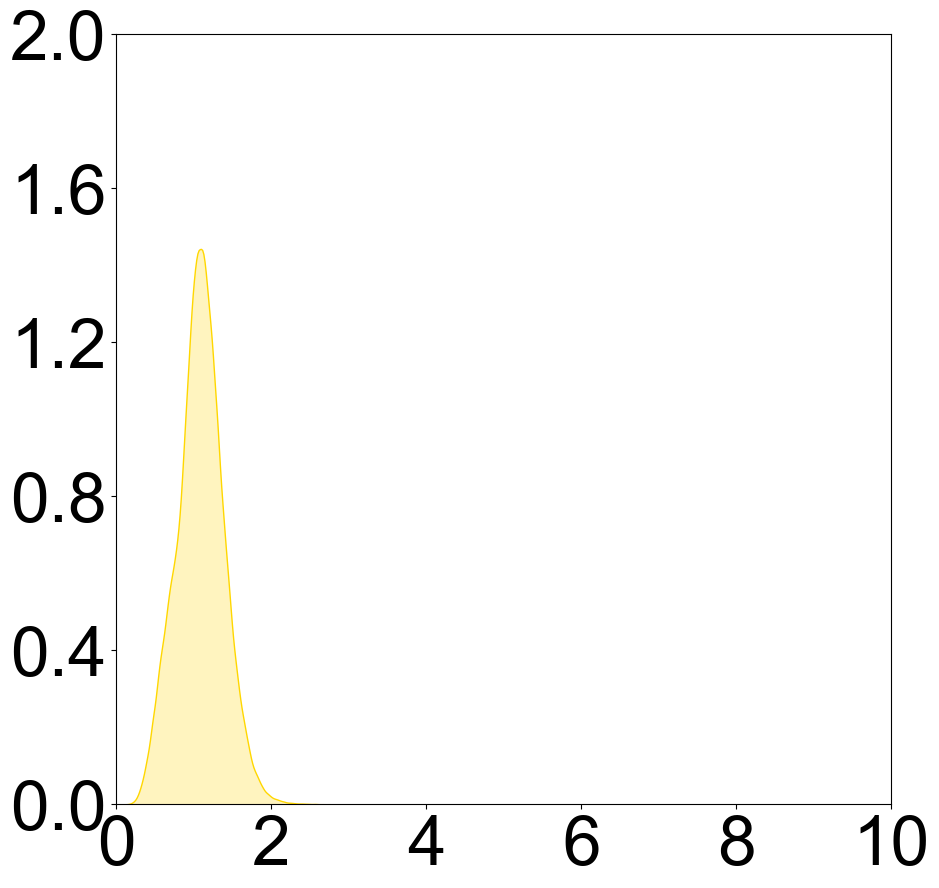

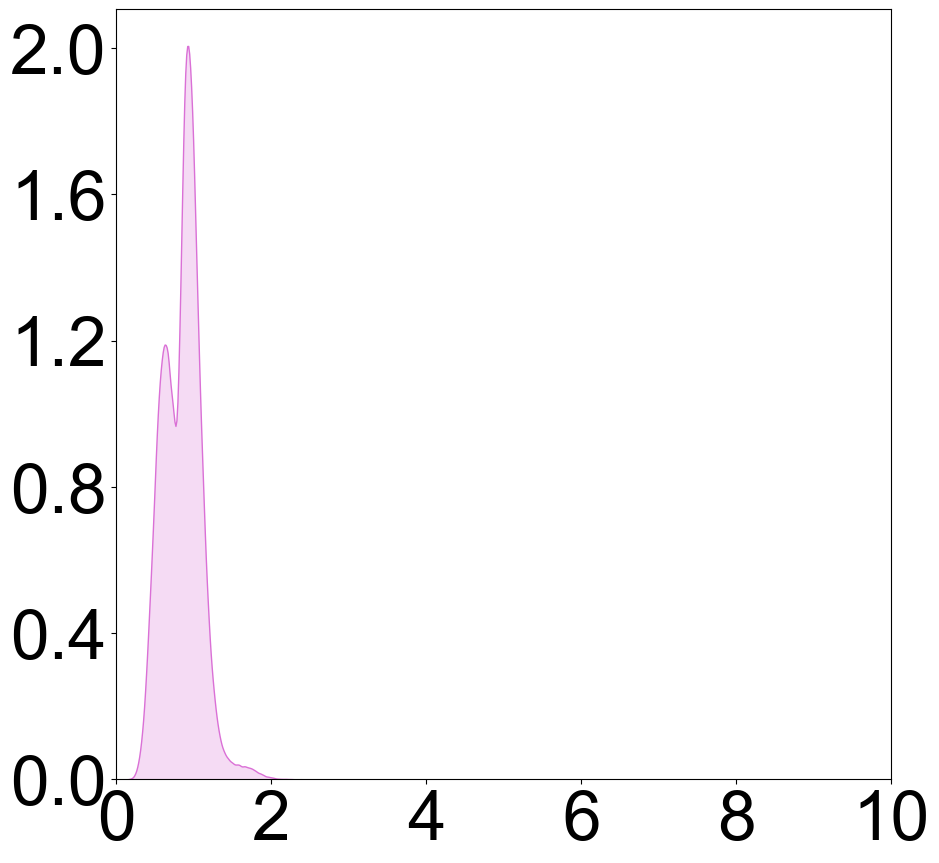

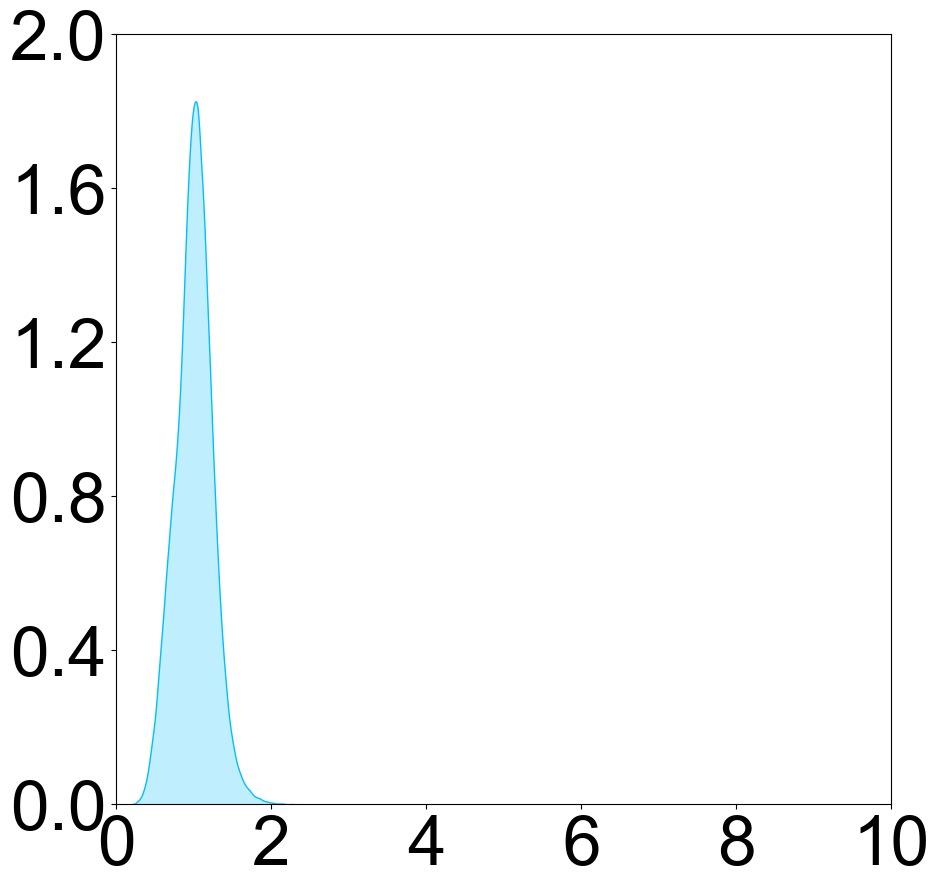

In [16]:
hist_plot(HG3_D_TSA_RMSD,'springgreen')
hist_plot(HG3_K50Q_TSA_RMSD,'springgreen')

hist_plot(HG3_S_TSA_RMSD,'gold')
hist_plot(HG3_C_TSA_RMSD,'orchid')
hist_plot(HG3_E_TSA_RMSD,'deepskyblue')

([<matplotlib.axis.YTick at 0x7fd9ca852d00>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30')])

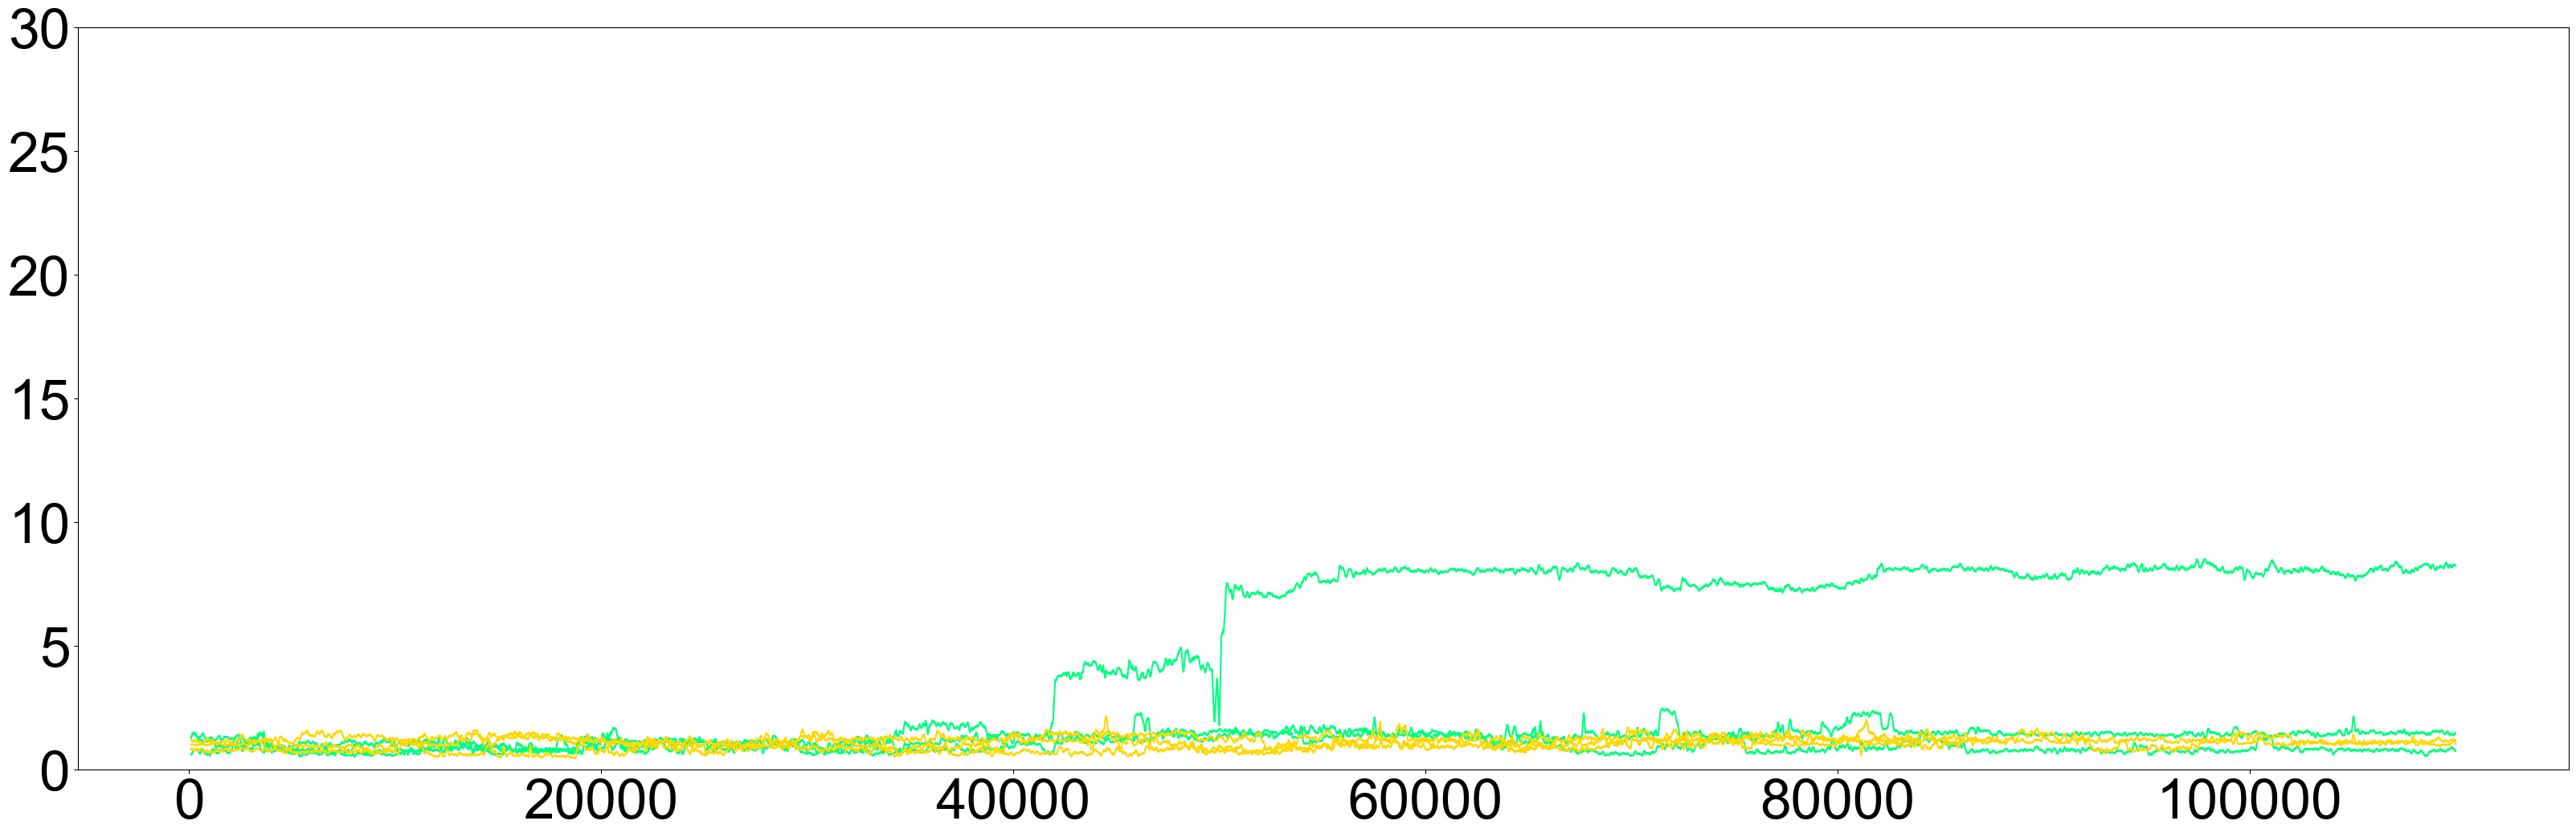

In [10]:
plt.figure(figsize=(40,12))
window = 100

plt.plot(pd.Series(HG3_D_TSA_RMSD[0:110000]).rolling(window).mean(),  color='springgreen', linestyle='-') 
plt.plot(pd.Series(HG3_D_TSA_RMSD[110001:220000]).rolling(window).mean(),  color='springgreen', linestyle='-') 
plt.plot(pd.Series(HG3_D_TSA_RMSD[220001:330000]).rolling(window).mean(),  color='springgreen', linestyle='-') 

plt.plot(pd.Series(HG3_S_TSA_RMSD[0:110000]).rolling(window).mean(),  color='gold', linestyle='-') 
plt.plot(pd.Series(HG3_S_TSA_RMSD[110001:220000]).rolling(window).mean(),  color='gold', linestyle='-') 
plt.plot(pd.Series(HG3_S_TSA_RMSD[220001:330000]).rolling(window).mean(),  color='gold', linestyle='-') 



plt.xticks(np.arange(0,120000,20000),fontsize=50, fontname='Arial')
plt.yticks(np.arange(0,32,5),fontsize=50, fontname='Arial')

([<matplotlib.axis.YTick at 0x7fd9ca0fa6a0>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30')])

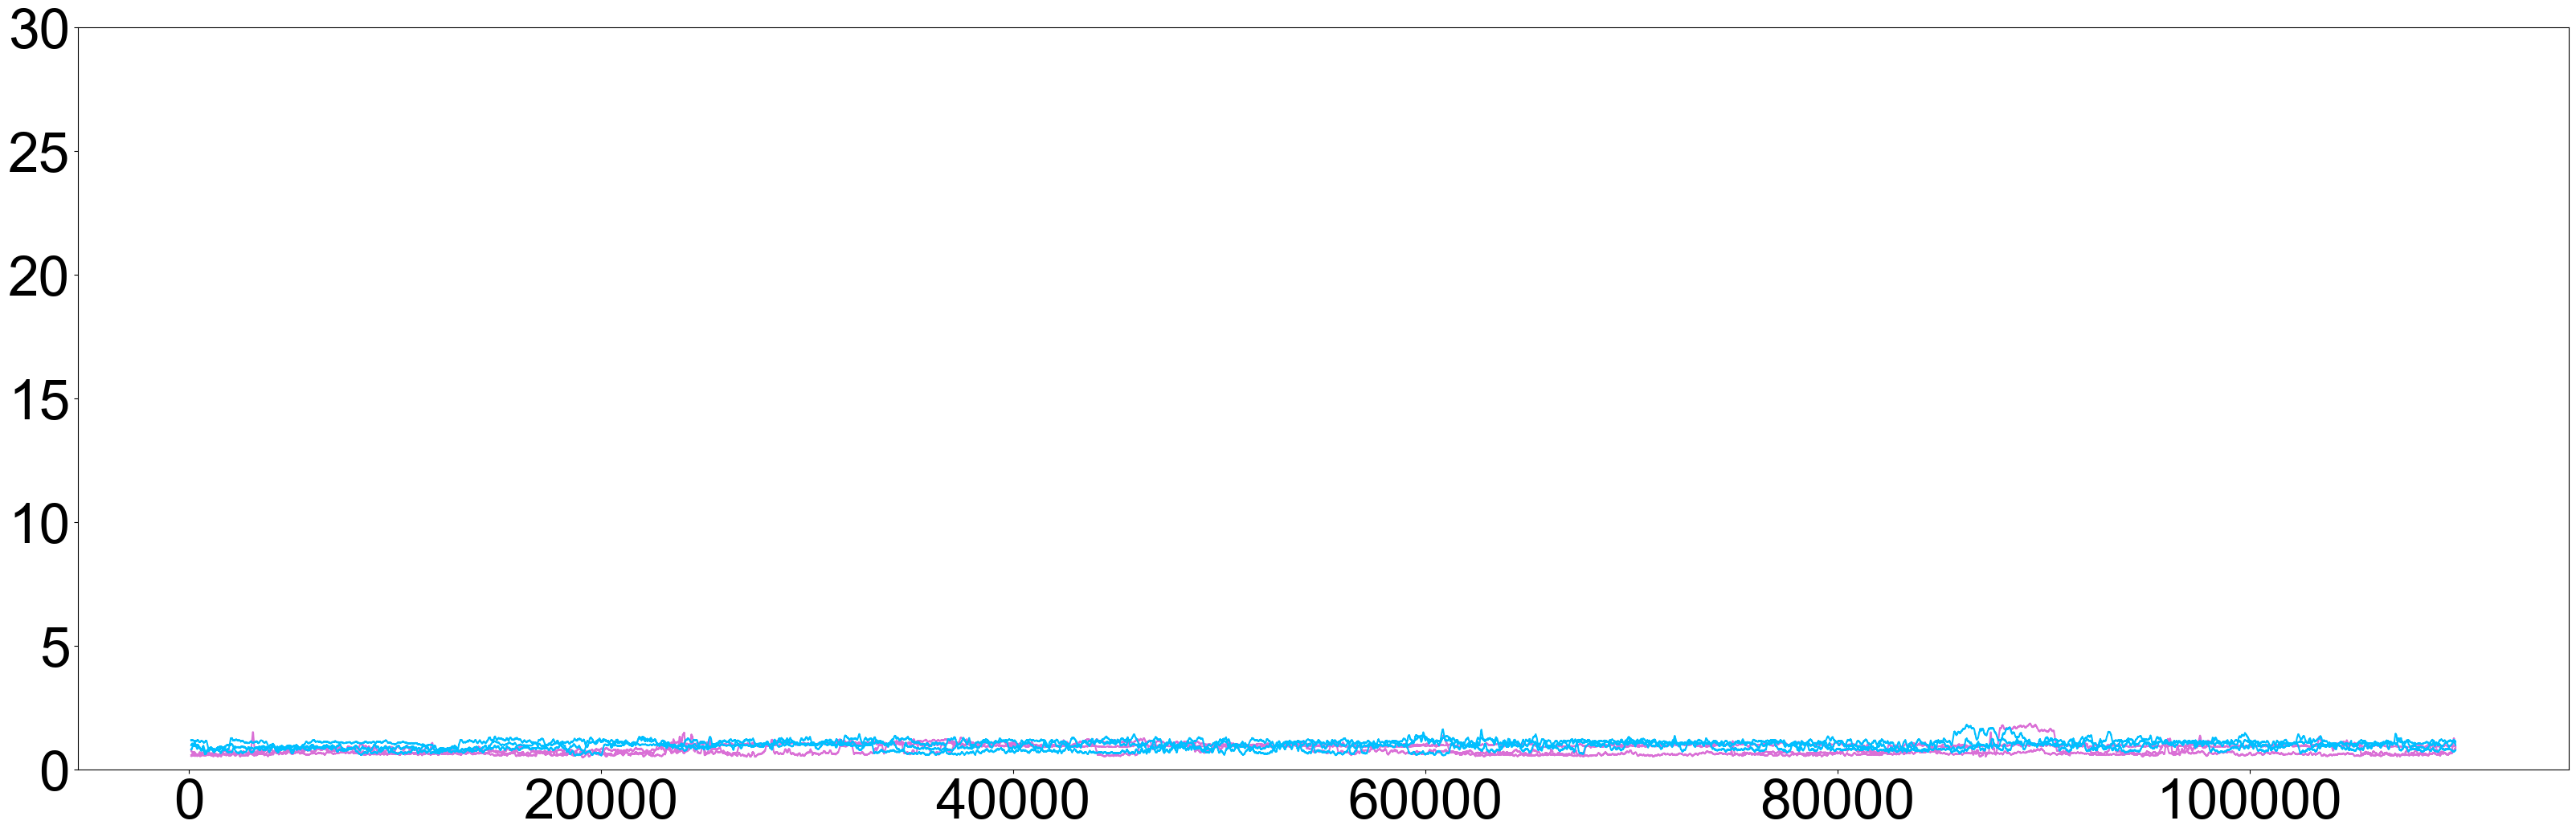

In [11]:
plt.figure(figsize=(40,12))
window = 100

plt.plot(pd.Series(HG3_C_TSA_RMSD[0:110000]).rolling(window).mean(),  color='orchid', linestyle='-') 
plt.plot(pd.Series(HG3_C_TSA_RMSD[110001:220000]).rolling(window).mean(),  color='orchid', linestyle='-') 
plt.plot(pd.Series(HG3_C_TSA_RMSD[220001:330000]).rolling(window).mean(),  color='orchid', linestyle='-') 

plt.plot(pd.Series(HG3_E_TSA_RMSD[0:110000]).rolling(window).mean(),  color='deepskyblue', linestyle='-') 
plt.plot(pd.Series(HG3_E_TSA_RMSD[110001:220000]).rolling(window).mean(),  color='deepskyblue', linestyle='-') 
plt.plot(pd.Series(HG3_E_TSA_RMSD[220001:330000]).rolling(window).mean(),  color='deepskyblue', linestyle='-') 

plt.xticks(np.arange(0,120000,20000),fontsize=50, fontname='Arial')
plt.yticks(np.arange(0,32,5),fontsize=50, fontname='Arial')

In [12]:
HG3_K50Q_TSA_dist = pt.distance(HG3_K50Q, ':300@N3 :124@CG')
HG3_D_TSA_dist = pt.distance(HG3_D, ':300@N3 :124@CG')
HG3_S_TSA_dist = pt.distance(HG3_S, ':300@N3 :124@CG')
HG3_C_TSA_dist = pt.distance(HG3_C, ':300@N3 :124@CG')
HG3_E_TSA_dist = pt.distance(HG3_E, ':300@N3 :124@CG')

In [13]:
# Save Dist files
dist_files_directory = "/Volumes/Nia_HardDrive/HGs/Analysis_Bound/TSA_dist/"
pickle.dump(HG3_K50Q_TSA_dist, open (dist_files_directory + "dist_K50Q_Bound.p", "wb"))
pickle.dump(HG3_D_TSA_dist, open (dist_files_directory + "dist_D_Bound.p", "wb"))
pickle.dump(HG3_S_TSA_dist, open (dist_files_directory + "dist_S_Bound.p", "wb"))
pickle.dump(HG3_C_TSA_dist, open (dist_files_directory + "dist_C_Bound.p", "wb"))
pickle.dump(HG3_E_TSA_dist, open (dist_files_directory + "dist_E_Bound.p", "wb"))

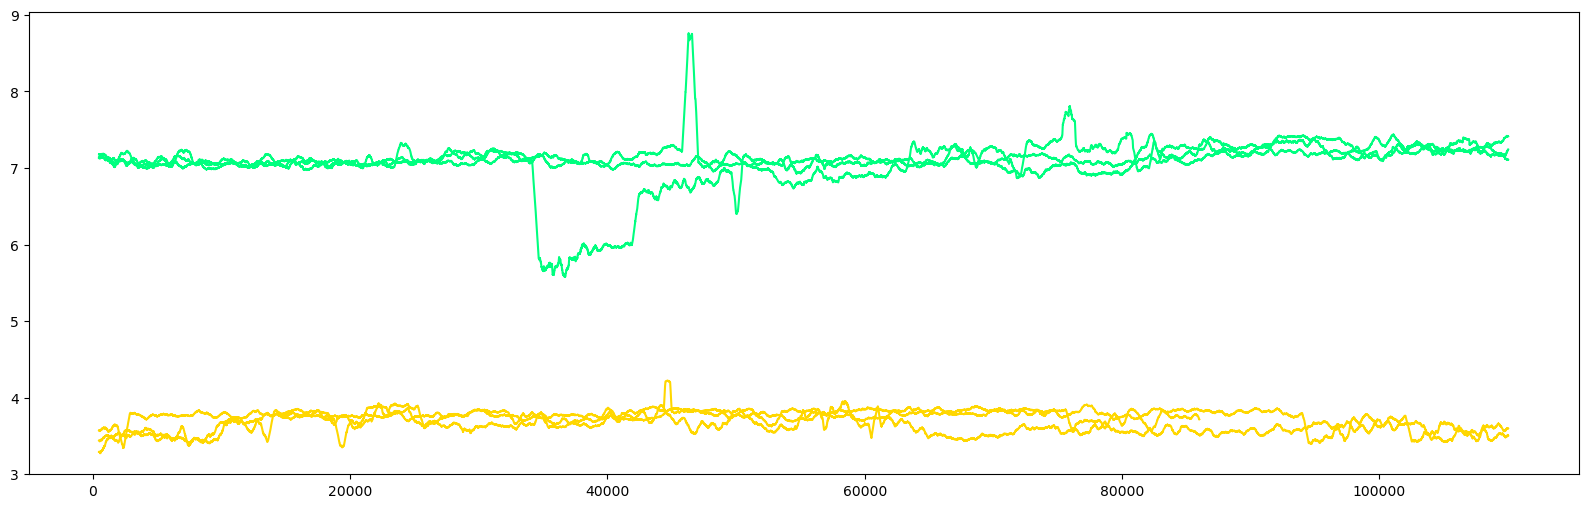

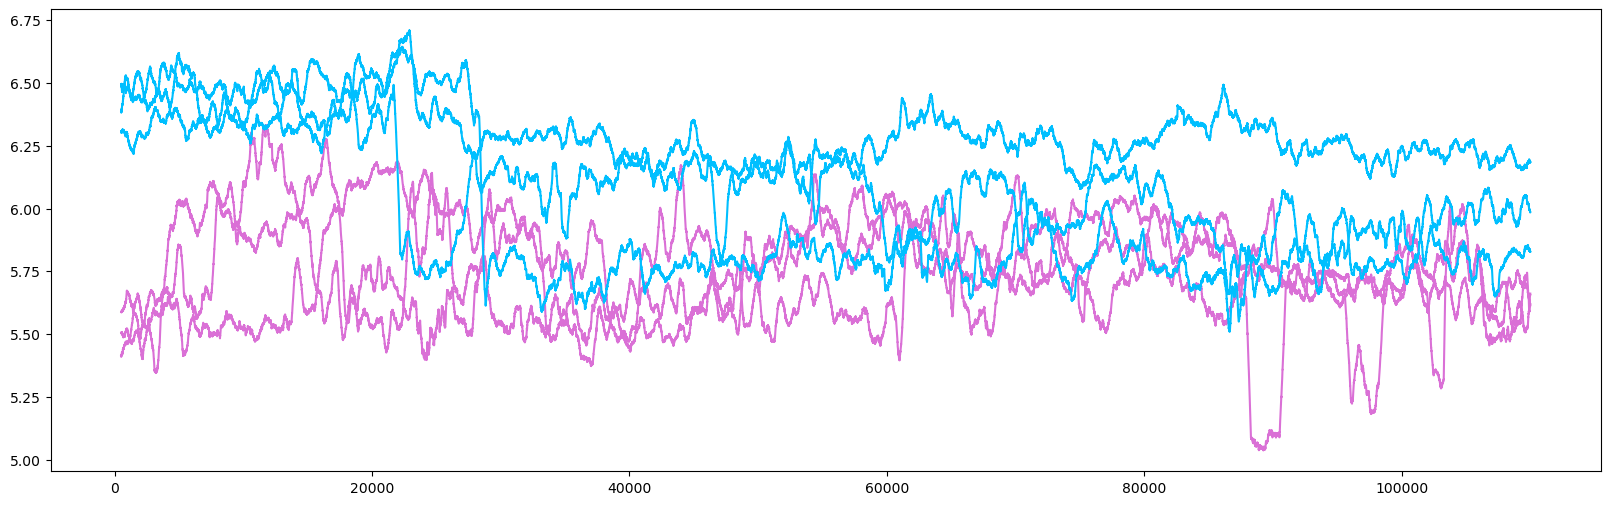

In [14]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(HG3_D_TSA_dist[0:110000]).rolling(window).mean(),  color='springgreen', linestyle='-') 
plt.plot(pd.Series(HG3_D_TSA_dist[110001:220000]).rolling(window).mean(),  color='springgreen', linestyle='-') 
plt.plot(pd.Series(HG3_D_TSA_dist[220001:330000]).rolling(window).mean(),  color='springgreen', linestyle='-') 

plt.plot(pd.Series(HG3_S_TSA_dist[0:110000]).rolling(window).mean(),  color='gold', linestyle='-') 
plt.plot(pd.Series(HG3_S_TSA_dist[110001:220000]).rolling(window).mean(),  color='gold', linestyle='-') 
plt.plot(pd.Series(HG3_S_TSA_dist[220001:330000]).rolling(window).mean(),  color='gold', linestyle='-') 

plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(HG3_C_TSA_dist[0:110000]).rolling(window).mean(),  color='orchid', linestyle='-') 
plt.plot(pd.Series(HG3_C_TSA_dist[110001:220000]).rolling(window).mean(),  color='orchid', linestyle='-') 
plt.plot(pd.Series(HG3_C_TSA_dist[220001:330000]).rolling(window).mean(),  color='orchid', linestyle='-') 

plt.plot(pd.Series(HG3_E_TSA_dist[0:110000]).rolling(window).mean(),  color='deepskyblue', linestyle='-') 
plt.plot(pd.Series(HG3_E_TSA_dist[110001:220000]).rolling(window).mean(),  color='deepskyblue', linestyle='-') 
plt.plot(pd.Series(HG3_E_TSA_dist[220001:330000]).rolling(window).mean(),  color='deepskyblue', linestyle='-') 



In [25]:
HG3_D_TSA_dist = pt.distance(HG3_D, ':300@C1,C2,C3,C4,C5,C6, :124@CG')
HG3_S_TSA_dist = pt.distance(HG3_S, ':300@C1,C2,C3,C4,C5,C6, :124@CG')
HG3_C_TSA_dist = pt.distance(HG3_C, ':300@C1,C2,C3,C4,C5,C6, :124@CG')
HG3_E_TSA_dist = pt.distance(HG3_E, ':300@C1,C2,C3,C4,C5,C6, :124@CG')
HG3_K50Q_TSA_dist = pt.distance(HG3_K50Q, ':300@C1,C2,C3,C4,C5,C6, :124@CG')


In [26]:
# Save Distance files
rmsd_files_directory = "/Volumes/Nia_HardDrive/HGs/Analysis_Bound/TSA_dist_centroid/"
pickle.dump(HG3_D_TSA_dist, open (rmsd_files_directory + "rmsd_D_Distances.p", "wb"))
pickle.dump(HG3_S_TSA_dist, open (rmsd_files_directory + "rmsd_S_Distances.p", "wb"))
pickle.dump(HG3_C_TSA_dist, open (rmsd_files_directory + "rmsd_C_Distances.p", "wb"))
pickle.dump(HG3_E_TSA_dist, open (rmsd_files_directory + "rmsd_E_Distances.p", "wb"))
pickle.dump(HG3_K50Q_TSA_dist, open (rmsd_files_directory + "rmsd_K50Q_Distances.p", "wb"))

In [12]:
# Loading Previously Saved RMSD files

rmsd_files_directory = "/Volumes/Nia_HardDrive/HGs/Analysis_Bound/TSA_dist_centroid/"
HG3_K50Q_TSA_dist = pickle.load(open(rmsd_files_directory + 'rmsd_K50Q_Distances.p','rb'))
HG3_D_TSA_dist = pickle.load(open(rmsd_files_directory + 'rmsd_D_Distances.p','rb'))
HG3_S_TSA_dist = pickle.load(open(rmsd_files_directory + 'rmsd_S_Distances.p','rb'))
HG3_C_TSA_dist = pickle.load(open(rmsd_files_directory + 'rmsd_C_Distances.p','rb'))
HG3_E_TSA_dist = pickle.load(open(rmsd_files_directory + 'rmsd_E_Distances.p','rb'))


In [37]:
import seaborn as sns

def hist_plot(all_data,mcolor,title):
    plt.figure(figsize=(10,10))
    plt.xlim(0,10)
    #plt.ylim(0,30)
    #plt.axvline(np.median(br_data),color='dimgray',ls='--', lw=2)

    #bins = np.arange(10,30,0.5)
    #kwargs = dict(bins = bins,density=False,stacked=True,ec='black')
    sns.kdeplot(np.array(all_data),color=mcolor,fill=mcolor)
    #plt.hist(br_data1, color=mcolor, **kwargs)
    #plt.hist(br_data2, color=mcolor, **kwargs)


    plt.xticks(np.arange(0,10,2),fontsize=50, fontname='Arial')
    plt.yticks(np.arange(0,1.8,0.2),fontsize=50, fontname='Arial')

    #plt.xlabel('Bottleneck Radius',fontsize=30)
    #plt.ylabel('Density',fontsize=30)
    plt.ylabel('')

    #print(np.mean(br_data))
   # print(np.median(br_data))

    #plt.axes([.55, .5, .3, .3], facecolor='y')
   
    plt.savefig(str(title)+'.png',transparent=True,dpi='figure')

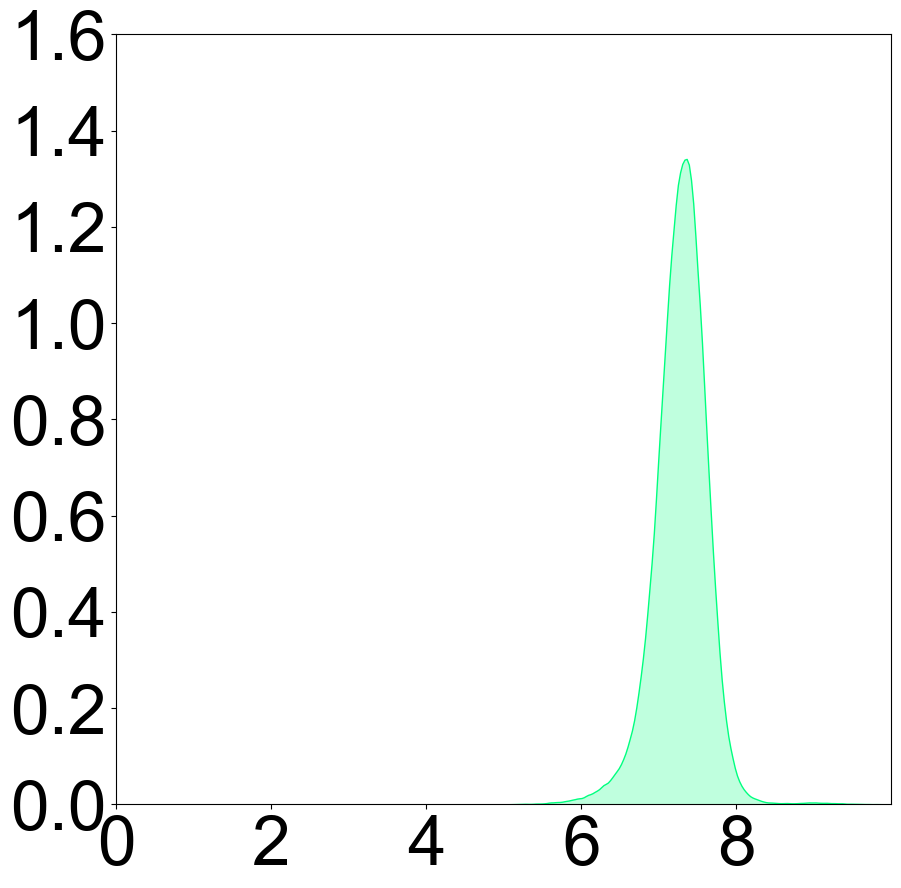

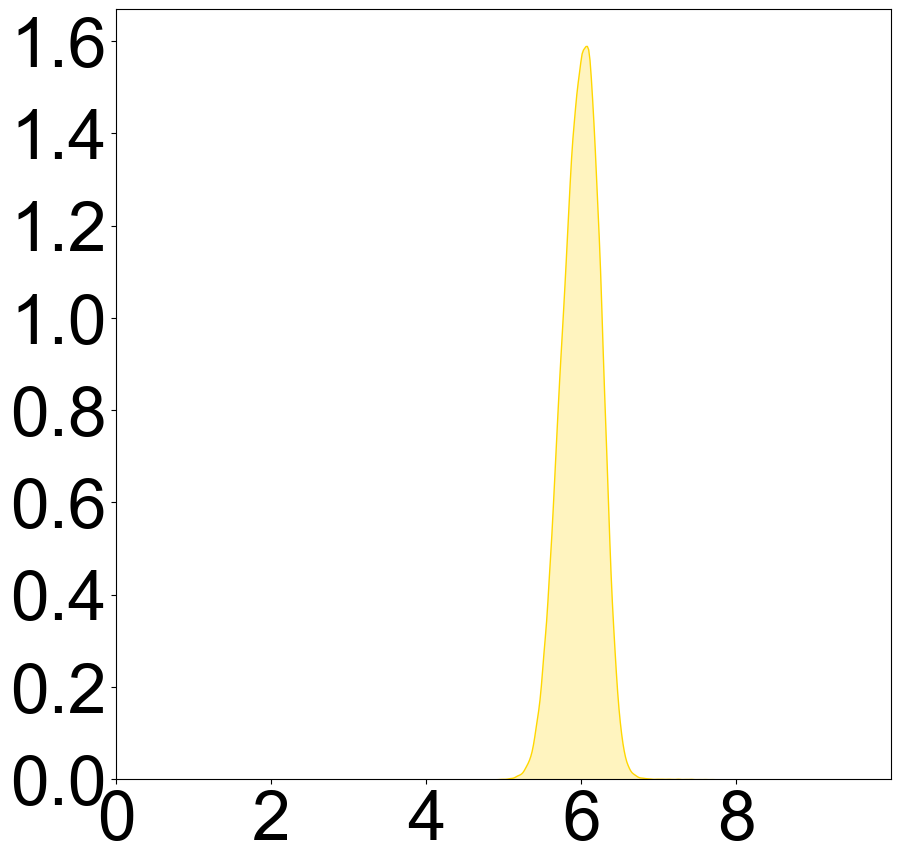

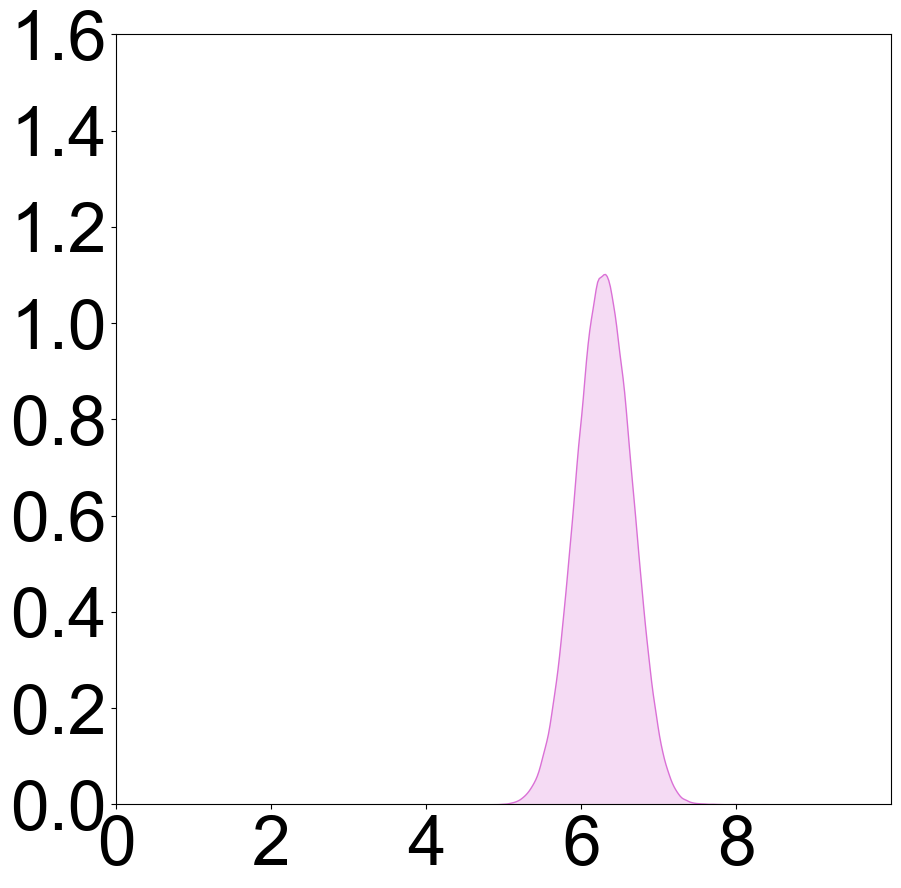

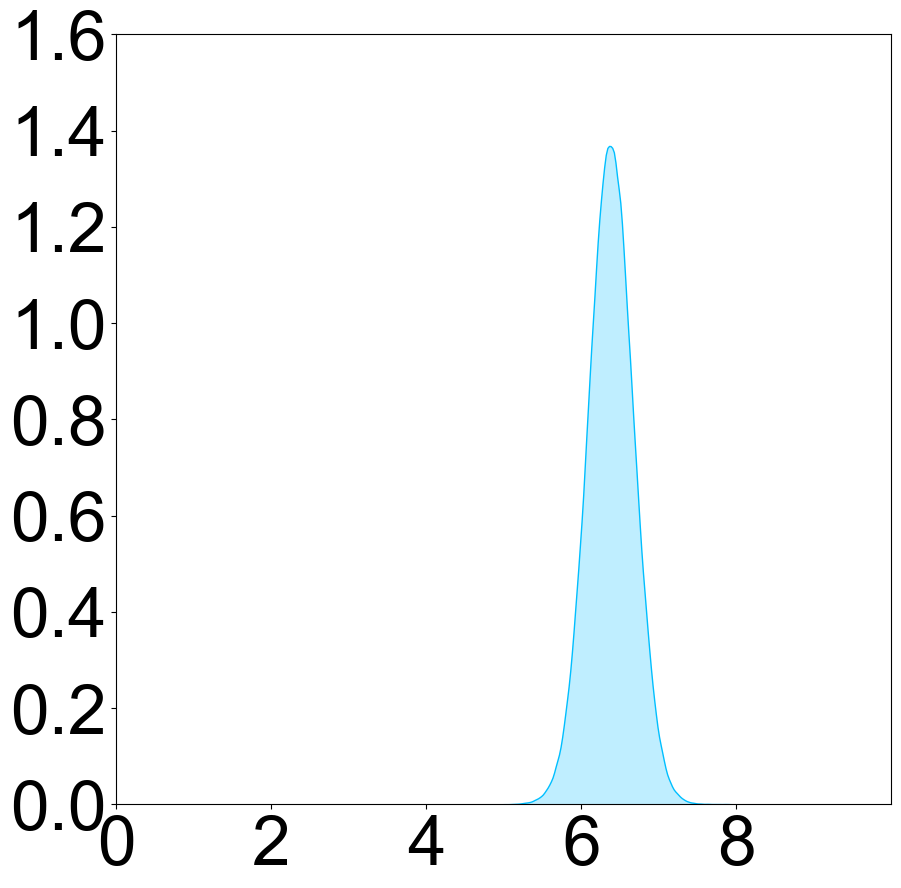

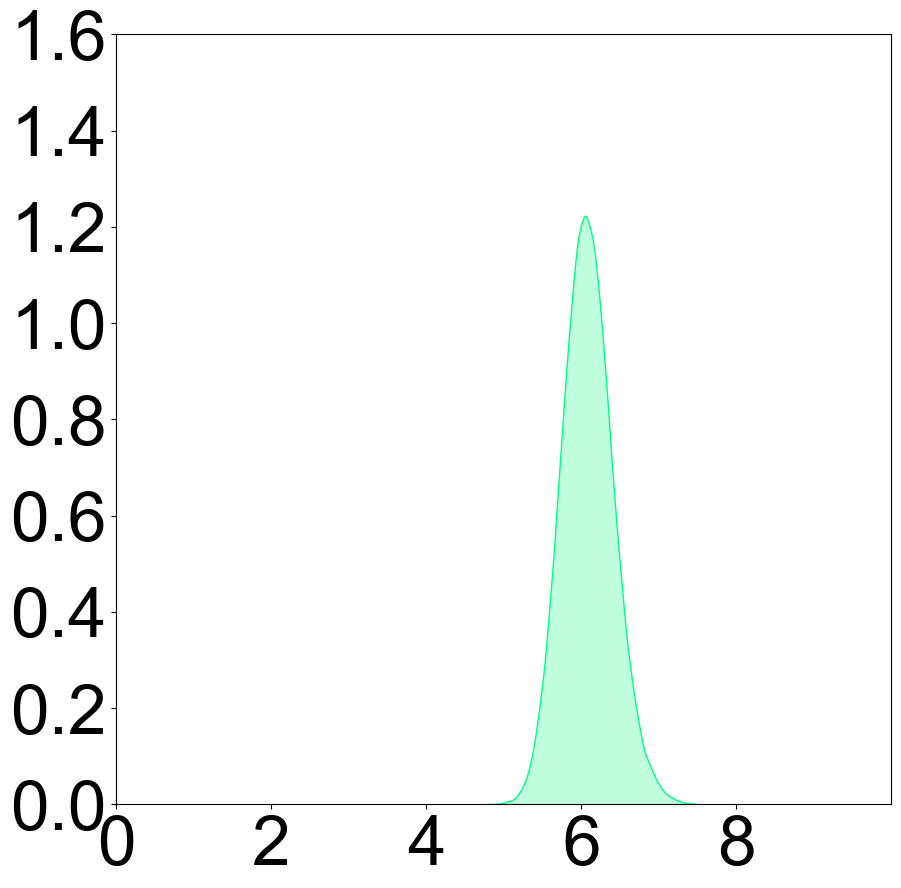

In [39]:
hist_plot(HG3_D_TSA_dist,'springgreen','1A53D_TSA_dist')
hist_plot(HG3_S_TSA_dist,'gold','1A53S_TSA_dist')
hist_plot(HG3_C_TSA_dist,'orchid','1A53C_TSA_dist')
hist_plot(HG3_E_TSA_dist,'deepskyblue','1A53E_TSA_dist')
hist_plot(HG3_K50Q_TSA_dist,'springgreen','1A53D_TSA_dist')
